In [12]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import 

from pprint import pprint

In [2]:
df = pd.read_json(os.getcwd() + '/Data/aptsimulator_cobaltstrike_2021-06-11T21081492.json', lines = True)
df.shape

(2611, 126)

In [3]:
df.head()

,SourceName,ProviderGuid,Level,Keywords,Channel,Hostname,TimeCreated,@timestamp,EventID,Message,...,ServiceType,ServiceStartType,ServiceAccount,ClientProcessStartKey,ClientProcessId,ImagePath,StartType,AccountName,param1,param2
0,Microsoft-Windows-Sysmon,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:15.635Z,2021-06-11T09:07:15.635Z,1,Process Create:\r\nRuleName: -\r\nUtcTime: 202...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Microsoft-Windows-Sysmon,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:15.636Z,2021-06-11T09:07:15.636Z,10,Process accessed:\r\nRuleName: -\r\nUtcTime: 2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Microsoft-Windows-Sysmon,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:15.636Z,2021-06-11T09:07:15.636Z,10,Process accessed:\r\nRuleName: -\r\nUtcTime: 2...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Microsoft-Windows-Sysmon,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:15.636Z,2021-06-11T09:07:15.636Z,7,Image loaded:\r\nRuleName: -\r\nUtcTime: 2021-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Microsoft-Windows-Sysmon,{5770385f-c22a-43e0-bf4c-06f5698ffbd9},4,0x8000000000000000,Microsoft-Windows-Sysmon/Operational,WORKSTATION5,2021-06-11T09:07:15.636Z,2021-06-11T09:07:15.636Z,7,Image loaded:\r\nRuleName: -\r\nUtcTime: 2021-...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
x = [i for i in range(0, 126, 25)]

for i in range(len(x) - 1):
    pprint(df.iloc[:, x[i] : x[i + 1]].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2611 entries, 0 to 2610
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SourceName        2611 non-null   object
 1   ProviderGuid      2611 non-null   object
 2   Level             2611 non-null   int64 
 3   Keywords          2611 non-null   object
 4   Channel           2611 non-null   object
 5   Hostname          2611 non-null   object
 6   TimeCreated       2611 non-null   object
 7   @timestamp        2611 non-null   object
 8   EventID           2611 non-null   int64 
 9   Message           2611 non-null   object
 10  Task              2611 non-null   int64 
 11  RuleName          2264 non-null   object
 12  UtcTime           2264 non-null   object
 13  ProcessGuid       1170 non-null   object
 14  ProcessId         1431 non-null   object
 15  Image             1170 non-null   object
 16  FileVersion       948 non-null    object
 17  Description   

In [5]:
# df.to_csv(os.getcwd() + '/Data/data_csv.csv')
# print('Done')

In [14]:
# df[['TimeCreated', '@timestamp', 'EventID', 'Level', 'Keywords']]

In [15]:
df['SourceName'].value_counts()

Microsoft-Windows-Sysmon               2264
Microsoft-Windows-Security-Auditing     344
Service Control Manager                   3
Name: SourceName, dtype: int64

In [21]:
df['ProviderGuid'] = df['ProviderGuid'].apply(lambda x: x[1 : -1])
df['ProviderGuid'].value_counts()

5770385f-c22a-43e0-bf4c-06f5698ffbd9    2264
54849625-5478-4994-a5ba-3e3b0328c30d     344
555908d1-a6d7-4695-8e1e-26931d2012f4       3
Name: ProviderGuid, dtype: int64

In [23]:
df['Level'].value_counts()

4    2265
0     344
2       2
Name: Level, dtype: int64

In [24]:
df['Channel'].value_counts()

Microsoft-Windows-Sysmon/Operational    2264
Security                                 344
System                                     3
Name: Channel, dtype: int64

In [25]:
df['Hostname'].value_counts()

WORKSTATION5    2611
Name: Hostname, dtype: int64

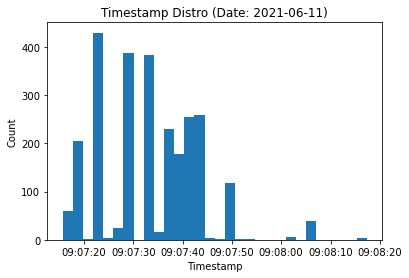

In [31]:
df['@timestamp'] = pd.to_datetime(df['@timestamp'])

plt.hist(df['@timestamp'], bins = 30, log = False)
plt.title('Timestamp Distro (Date: 2021-06-11)')
plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.show()
plt.close()